In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from PIL import Image
from skimage import io

In [2]:
root_data_dir = '../../data/200003076/'
annotation_data = pd.read_csv(root_data_dir + '200003076_coordinate.csv')

In [283]:
def two_dimensional_gaussian(x, mean, std):
    epsilon = 1e-5
    std += epsilon
    two_dimensional_gaussian = np.exp(-0.5 * np.dot((x-mean) / std, x-mean)) # / (2*np.pi*np.sqrt(std[0]*std[1]))
    return two_dimensional_gaussian

In [344]:
# 画像の置いてあるディレクトリ名 image_dir、画像のファイル名 image_name、アノテーションデータのcsvファイル annotation_csv、
# バウンディングボックスから標準偏差を抽出するときに用いるkシグマ区間のkを表す整数 k_sigma、を引数に取り、
# ラベルを生成してnp.array形式で返す関数
def make_label_gaussian(image_dir, image_name, annotation_csv, k_sigma):
    image_shape = io.imread(image_dir + image_name).shape[:2]
    label_np = np.zeros(image_shape)

    image_name, _ = image_name.split('.')
    annotation_csv_for_image = annotation_csv[annotation_csv.Image == image_name]
    
    if len(annotation_csv_for_image) == 0:
        return label_np
    
    annotation_data_bounding_box = annotation_csv_for_image[['X', 'Y', 'Width', 'Height']].values.tolist()
    
    for X, Y, Width, Height in annotation_data_bounding_box:
        mean = np.array([Y + 0.5*Height, X + 0.5*Width])
        std = np.array([0.5*Height / k_sigma, 0.5*Width / k_sigma])
        
        mean_int = np.round(mean).astype(np.int32)
        
        for i in range(max(0, mean_int[0]-Height), min(image_shape[0], mean_int[0]+Height)):
            for j in range(max(0, mean_int[1]-Width), min(image_shape[1], mean_int[1]+Width)):
                label_np[i][j] += two_dimensional_gaussian(np.array([i,j]).astype(np.float32), mean, std)
                
    label_np = label_np / np.max(label_np)
        
    return label_np

In [359]:
s = time.time()
root_image_dir = root_data_dir + 'images/'
files = os.listdir(root_image_dir)
output_dir = root_data_dir + 'labels/gaussian_0.5/'
if not os.path.exists(output_dir):
    os.mkdir(output_dir)
    
for f in files:
    label = make_label_gaussian(root_image_dir, f, annotation_data, 0.05)
    io.imsave(output_dir + f, label)
print(time.time() - s)

/home/kaito/.local/lib/python3.5/site-packages/skimage/util/dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/home/kaito/.local/lib/python3.5/site-packages/skimage/io/_io.py:140: UserWarning: ../../data/200003076/labels/gaussian_0.5/200003076_00082_2.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/kaito/.local/lib/python3.5/site-packages/skimage/io/_io.py:140: UserWarning: ../../data/200003076/labels/gaussian_0.5/200003076_00057_2.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/kaito/.local/lib/python3.5/site-packages/skimage/io/_io.py:140: UserWarning: ../../data/200003076/labels/gaussian_0.5/200003076_00133_2.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/kaito/.local/lib/python3.5/site-packages/skimage/io/_io.py:140: UserWarning: ../../data/200003076/labels/gaussian_0.5/200003076_00177_2.jpg is a low contrast imag

/home/kaito/.local/lib/python3.5/site-packages/skimage/io/_io.py:140: UserWarning: ../../data/200003076/labels/gaussian_0.5/200003076_00105_2.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/kaito/.local/lib/python3.5/site-packages/skimage/io/_io.py:140: UserWarning: ../../data/200003076/labels/gaussian_0.5/200003076_00143_2.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/kaito/.local/lib/python3.5/site-packages/skimage/io/_io.py:140: UserWarning: ../../data/200003076/labels/gaussian_0.5/200003076_00155_2.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/kaito/.local/lib/python3.5/site-packages/skimage/io/_io.py:140: UserWarning: ../../data/200003076/labels/gaussian_0.5/200003076_00051_2.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/kaito/.local/lib/python3.5/site-packages/skimage/io/_io.py:140: UserWarning: ../../data/200003076/labels/gaussian_0.5/200003076_00035_

21844.790735721588


(3157, 2324, 3)


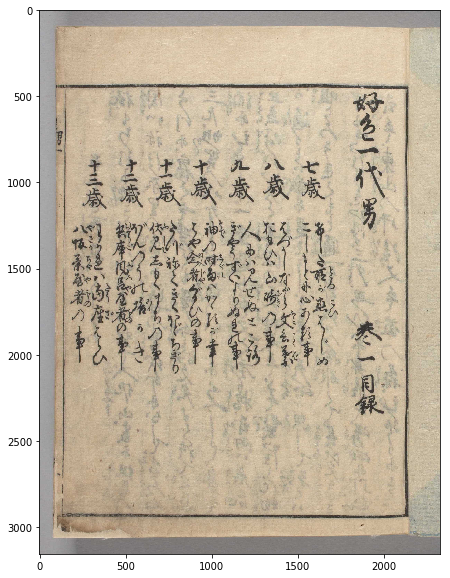

In [353]:
plt.figure(figsize = (10,10))
image = io.imread(root_data_dir+'images/' + '200003076_00004_2.jpg')
plt.imshow(image)
print(image.shape)

(3157, 2324)


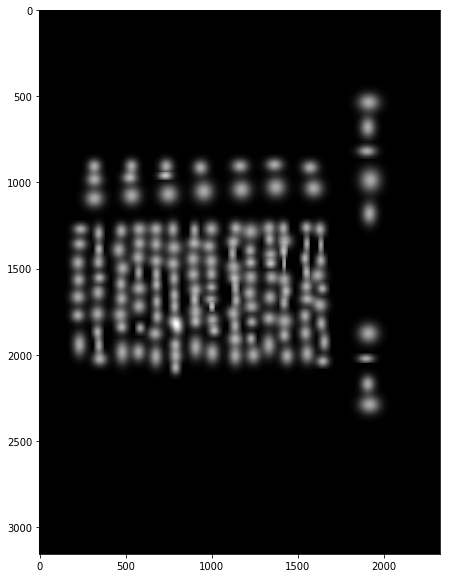

In [354]:
plt.figure(figsize = (10,10))
plt.imshow(label, cmap='gray')
print(label.shape)